<h1><center>LDA implementation step by step</center></h1>

LDA a methed that aims to maximaze the searation between two or more groups by:
1. Maximize the between-groups variance (The difference between means)
2. Minimize the within-groups variance (The variance within each category)

In [25]:
# Libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import preprocessing

In [26]:
help(load_iris)

Help on function load_iris in module sklearn.datasets._base:

load_iris(*, return_X_y=False, as_frame=False)
    Load and return the iris dataset (classification).
    
    The iris dataset is a classic and very easy multi-class classification
    dataset.
    
    =================   ==============
    Classes                          3
    Samples per class               50
    Samples total                  150
    Dimensionality                   4
    Features            real, positive
    =================   ==============
    
    Read more in the :ref:`User Guide <iris_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object. See
        below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    as_frame : bool, default=False
        If True, the data is a pandas DataFrame including columns with
        appropriate dtypes (numeric). 

In [27]:
#@title LDA function 
def LDA(X, y, n_component):
  n_features = X.shape[1]        # Number of features; (_, n_features = X.shape)
  class_labels = np.unique(y)    # The array of categories

  # Computing the d-dimensional mean vectors
  mean_vectors = []
  for cl in class_labels:
    mean_vectors.append(np.mean(X[y == cl], axis=0))

  # The within-class scatter matrix
  SW = np.zeros((n_features, n_features))                               # Initialize SW; square matrix (n_features)
  for cl, mv in zip(class_labels, mean_vectors):                        
    class_sc_mat = np.zeros((n_features, n_features))                   # Scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(n_features, 1), mv.reshape(n_features, 1) # Make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    SW += class_sc_mat

  # Overall mean 
  overall_mean = np.mean(X, axis=0)

  # The between-class scatter matrix SB
  SB = np.zeros((n_features, n_features))                                               # Initialize SW; square matrix (n_features)             
  for i, mv in enumerate(mean_vectors):                                                 # (i for indexes, mv for mean_vectors)
    n = X[y == i, :].shape[0]                                                           # Number of rows in the class i
    mv, overall_mean = mv.reshape(n_features, 1), overall_mean.reshape(n_features, 1)   # Make column vector
    SB += n * (mv - overall_mean).dot((mv - overall_mean).T)

  # Solving the generalized eigenvalue problem for the matrix SW^(-1)*SB
  eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(SW).dot(SB))

  # Make a list of (eigenvalue, eigenvector) tuples
  eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]  

  # Sorting the eigenvectors by decreasing eigenvalues
  eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

  # Choosing k eigenvectors with the largest eigenvalues
  W = np.hstack((eig_pairs[0][1].reshape(n_features, 1), eig_pairs[1][1].reshape(n_features, 1)))

  # Transforming the samples onto the new subspace
  X_lda = X.dot(W)

  return X_lda

**Linear Discriminant Analysis or LDA** <br>


---


Linear Discriminant Analysis can be broken up into the following steps:


1. Compute the within class and between class scatter matrices
2. Compute the eigenvectors and corresponding eigenvalues for the scatter matrices
3. Sort the eigenvalues and select the top k
4. Create a new matrix containing eigenvectors that map to the k eigenvalues
5. Obtain the new features (i.e. LDA components) by taking the dot product of the data and the matrix from step 4


---




In [28]:
# Load 'iris' dataset
iris = load_iris()
X = iris.data
y = iris.target 

In [29]:
pd.DataFrame(iris.data, columns=iris.feature_names).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
n_components = 2
X_lda = LDA(X, y, n_components)

In [31]:
# 'iris' dataset shape
pd.DataFrame(iris.data, columns=iris.feature_names).shape

(150, 4)

In [32]:
# There are 3 different kinds of iris
pd.Categorical.from_codes(iris.target, iris.target_names)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [33]:
n_features = X.shape[1]       # Number of features
class_labels = np.unique(y)   # The array of categories

In [34]:
# Computing the d-dimensional mean vectors
mean_vectors = []
for cl in class_labels:
    mean_vectors.append(np.mean(X[y == cl], axis=0))

# The Within-class scatter matrix SW
We calculate the within class scatter matrix using the following formula:

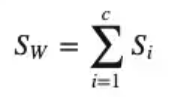

where c is the total number of distinct classes and

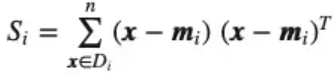

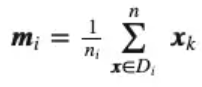

where x is a sample (i.e. row) and n is the total number of samples with a given class.

In [35]:
SW = np.zeros((n_features, n_features))                               # Initialize SW; square matrix (n_features)
for cl, mv in zip(class_labels, mean_vectors):                        # zip to iterate class_labels and mean_vectors simultanously
  class_sc_mat = np.zeros((n_features, n_features))                   # Scatter matrix for every class
  for row in X[y == cl]:
    row, mv = row.reshape(n_features, 1), mv.reshape(n_features, 1)   # Make column vectors: row and mv are arrays > 
                                                                      # we should make 'em column vectors                              
    class_sc_mat += (row-mv).dot((row-mv).T)
  SW += class_sc_mat

# The between-class scatter matrix
Next, we calculate the between class scatter matrix using the following formula:

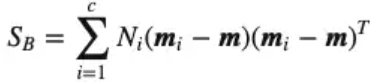

In [36]:
# Overall mean (i.e. mean(X))
overall_mean = np.mean(X, axis=0)

In [37]:
SB = np.zeros((n_features, n_features))                               # Initialize SW; square matrix (n_features)
for i, mv in enumerate(mean_vectors):                                 # (i for indexes, mv for mean_vectors)
    n = X[y == i, :].shape[0]
    mv = mv.reshape(n_features, 1)                                    # Make column vector
    overall_mean = overall_mean.reshape(n_features, 1)                # Make column vector
    SB += n * (mv - overall_mean).dot((mv - overall_mean).T)

In [38]:
# Solving the generalized eigenvalue problem for the matrix SW^(-1)*SB
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(SW).dot(SB))

In [39]:
# Print the eigenvector for each eigenvalue
for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:, i].reshape(n_features, 1)  
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.20874182]
 [-0.38620369]
 [ 0.55401172]
 [ 0.7073504 ]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.00653196]
 [-0.58661055]
 [ 0.25256154]
 [-0.76945309]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[ 0.84628672]
 [-0.37707843]
 [-0.37598829]
 [ 0.01560275]]
Eigenvalue 3: -4.14e-16

Eigenvector 4: 
[[-0.49998019]
 [ 0.44224093]
 [ 0.48745073]
 [-0.56288059]]
Eigenvalue 4: -6.91e-15


In [40]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [41]:
# Sorting the eigenvectors by decreasing eigenvalues
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)     # reverse = True: to sort the eigenvectors by decreasing eigenvalues

In [42]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.191929198278025
0.2853910426230765
6.910088646222294e-15
4.1364650775242776e-16


In [43]:
# Calcuate the Variance explained
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i, j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 99.12%
eigenvalue 2: 0.88%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


In [44]:
# Choosing k eigenvectors with the largest eigenvalues
W = np.hstack((eig_pairs[0][1].reshape(n_features, 1), eig_pairs[1][1].reshape(n_features, 1)))
W.real

array([[-0.20874182, -0.00653196],
       [-0.38620369, -0.58661055],
       [ 0.55401172,  0.25256154],
       [ 0.7073504 , -0.76945309]])

In [45]:
# Transforming the samples onto the new subspace
X_lda = X.dot(W)

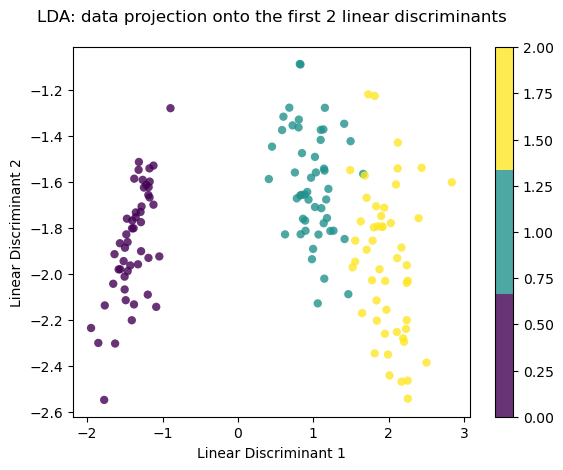

In [46]:
#@title LDA : Results visualization (1)
x1, x2 = X_lda[:, 0], X_lda[:, 1]
plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title('LDA: data projection onto the first 2 linear discriminants\n')
plt.colorbar()
plt.show()

# LDA for classification

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import *

lda = LinearDiscriminantAnalysis()
lda_t = lda.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
print(accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

0.9555555555555556


array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 22]], dtype=int64)

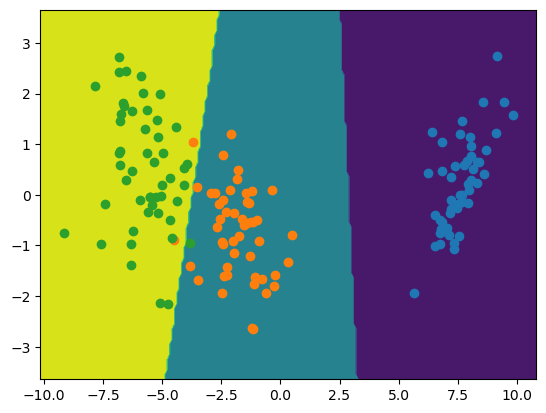

In [48]:

min1, max1 = lda_t[:, 0].min()-1, lda_t[:, 0].max()+1
min2, max2 = lda_t[:, 1].min()-1, lda_t[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid,x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1, r2))

model = LinearDiscriminantAnalysis()
model.fit(lda_t, y)
yhat = model.predict(grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='viridis')

for class_value in range(3):
  row_ix = np.where( y== class_value)
  plt.scatter(lda_t[row_ix, 0], lda_t[row_ix, 1])